Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [4]:
NAME = "WENBO SUN"
COLLABORATORS = "SHUAI WANG"

---

# Homework Set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 2, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

WENBO SUN  13087347  
SHUAI WANG 13128051

Run the following cell to import the necessary packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy in single-precision floating point numbers
Working with real numbers on a computer can sometimes be counter-intuitive. Not every real number cannot be represented exactly, because that would require an infinite amount of memory. Real numbers are in Python represented as "double-precision floating point numbers" that approximate the real numbers they represent. As such, the usual "rules of mathematics" no longer hold for very small or very large numbers:

In [3]:
print("very small numbers:")
print(1 - 1)          # Should be zero
print(1 - 1 + 1e-17)  # Should be 10 ** -17, i.e. a very small number
print(1 + 1e-17 - 1)  # Should *also* be 10**-17, but is it?

print("very large numbers:")
print(2.0**53)        # Some very large number
print(2.0**53 + 1.0)  # Some very large number + 1

very small numbers:
0
1e-17
0.0
very large numbers:
9007199254740992.0
9007199254740992.0


Usually, you don't have to worry about these rounding errors. But in scientific computing, these rounding errors sometimes become important. To reveal this problem more directly, we can decrease the precision of these approximations, using "single precision" instead of double precision floating point numbers, by employing `np.single`:

In [4]:
print(1.0 + 10**-9)             # Should be slightly above 1
print(np.single(1.0 + 10**-9))  # But in single precision, it is exactly 1.

1.000000001
1.0


Today we will practice with these single-precision floating point numbers. One thing to keep in mind is that Python will *really* try to work with double-precision floats:

In [5]:
a = 5.0
b = np.single(5.0)
print("a and b represent the same value:", a == b)
print("but they are of different types:", type(a), type(b))
print("If I add zero to a, its type does not change: ", type(a) == type(a + 0.0))
print("If I add zero to b, its type *does* change:   ", type(b) == type(b + 0.0))

a and b represent the same value: True
but they are of different types: <class 'float'> <class 'numpy.float32'>
If I add zero to a, its type does not change:  True
If I add zero to b, its type *does* change:    False


So we have to be extra careful when working with these single-precision numbers, to prevent these types changing. See the difference between `S` and `T` below.

In [6]:
S = 0.0
S += np.single(5.0)
print(type(S))

T = np.single(0.0)
T += np.single(5.0)
print(type(T))

<class 'numpy.float64'>
<class 'numpy.float32'>


## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


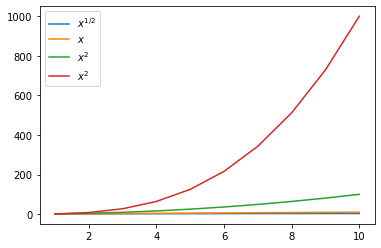

In [7]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

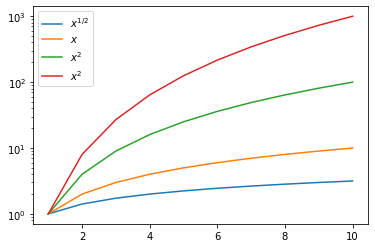

In [8]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


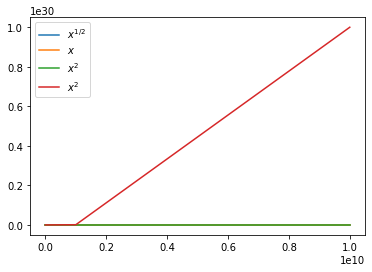

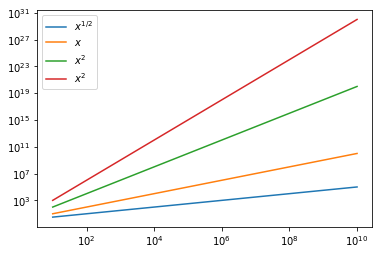

In [9]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

# Exercise 1

For $x \in [-1,1]$, the arctangent function can be expressed as a Taylor series
  $$
    \arctan(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)} .
  $$
  Inserting $x=1$ results in the following infinite sum for
  $\frac{\pi}{4}$
  $$
    \frac{\pi}{4}  = \sum_{n=0}^\infty (-1)^n \frac{1}{(2n+1)} .
  $$
  Approximations of $\frac{\pi}{4}$ can be obtained by computing
  finite sums, where we take the first $N$ terms, with $N$ large
  $$
    S_N = \sum_{n=0}^{N-1} a_n , \qquad a_n = (-1)^n \frac{1}{(2n+1)}
  $$
  N.B. In the exercise below **implement the sums yourself and sum the arguments in increasing order of the summation index**.

## (a) 2 points
1. Finish the function `compute_SN` below that computes the sum $S_N$ using double-precision numbers (`np.double`).
2. Use this function to compute the sum $S_N$ for $N \in \{10^1, 10^2, 10^3, \ldots, 10^7\}$ and store these values.

In [10]:
def compute_SN(N):
    n=np.double(0)
    sn=np.double(0)
    while n<N:
        sn+=np.double(-1)**n/(np.double(2)*n+np.double(1))
        n+=np.double(1)
    return sn

# Compute the sums and store in a variable.
# YOUR CODE HERE
Ns=[np.power(10,1),np.power(10,2),np.power(10,3),np.power(10,4),np.power(10,5),np.power(10,6),np.power(10,7)]
sums=list(map(lambda x:compute_SN(x),Ns))
print(sums)

[0.7604599047323508, 0.7828982258896384, 0.7851481634599485, 0.7853731633975086, 0.7853956633974299, 0.7853979133974436, 0.7853981383974479]


## (b) 2 points
1. Finish `compute_SN_single` below that computes the sum $S_N$ using single-precision numbers (`np.single`).
2. Use `compute_SN_single` to compute $S_N$ for the same set of $N$s as above. Use a log-log plot to visualize the errors $|S_N - \tfrac{\pi}{4}|$ for both double- and single-precision.

In [11]:
def compute_SN_single(N):
    # YOUR CODE HERE
    n=np.single(0)
    sn=np.single(0)
    while n<N:
        sn+=np.single(-1)**n/(np.single(2)*n+np.single(1))
        n+=np.single(1)
    return sn

# Compute the S_N and plot the results.
sums_single=list(map(lambda x:compute_SN_single(x),Ns))


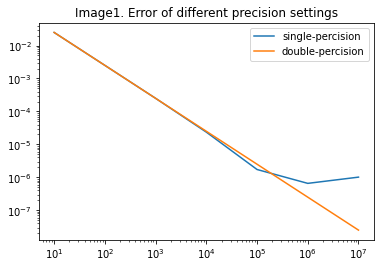

In [12]:
Xs=np.array(Ns)
single_array=np.abs(np.array(sums_single)-np.pi/4)
double_array=np.abs(np.array(sums)-np.pi/4)
f=plt.figure()
plt.loglog(Xs,single_array,label="single-percision")
plt.loglog(Xs,double_array,label="double-percision")
plt.title("Image1. Error of different precision settings")
plt.legend()
plt.show()

## (c) 2 points
Let $b_n = a_{2n} + a_{2n+1}$, and let $T_N = \sum_{n=0}^{N/2-1} b_n$.
1. Explain that for even $N$, $T_N = S_N$, and compute the sum $b_n= a_{2n} + a_{2n+1}$ analytically.
2. Now compute the sum $T_N$ for $N \in \{10^1, 10^2, 10^3, \ldots, 10^7\}$ using single-precision numbers and this analytical expression, and visualize the errors in a log-log plot.

**1.Answer:**
$$
\begin{align}
    T_N=&\sum^{N/2-1}_{n=0}(a_{2n}+a_{2n+1}) \\
     =&\sum^{N/2-1}_{n=0}a_{2n} + \sum^{N/2-1}_{n=0}a_{2n+1}
\end{align}$$
When N is even, Let i=2n (even) and j=2n+1 (odd), i,j are all integers <= N. Then we have
$\sum^{N-2}_{i=0}a_{i}+\sum^{N-1}_{j=1}a_{j}$ which euqals to $S_N$

$$
\begin{align}
b_n=&a_{2n}+a_{2n+1} \\
=&(-1)^{2n}\frac{1}{2(2n)+1}+(-1)^{2n+1}\frac{1}{2(2n+1)+1} \\
=&\frac{1}{4n+1}-\frac{1}{4n+3} \\
\end{align}$$

In [13]:
# Write your answer to subquestion 2 here.
def sum_Tn(N):
    new_N=np.single(N//2-1)
    print(new_N)
    count=np.single(0)
    Tn=np.single(0)
    while count<=new_N:
        Tn+=(np.single(1)/(np.multiply(np.single(4),count)+np.single(1))-np.single(1)/(np.multiply(np.single(4),count)+np.single(3)))
#         Tn+=np.single(2)/(np.multiply(np.single(4),count)+np.single(1))/(np.multiply(np.single(4),count)+np.single(3))
        count+=np.single(1)
    return Tn
# YOUR CODE HERE
sums_TN=list(map(lambda x:sum_Tn(x),Ns))
print(sums_TN)


4.0
49.0
499.0
4999.0
49999.0
499999.0
4999999.0
[0.7604599, 0.78289825, 0.7851482, 0.7853459, 0.7853459, 0.7853459, 0.7853459]


In [14]:
print(sums)
print(sums_single)
print(sums_TN)

[0.7604599047323508, 0.7828982258896384, 0.7851481634599485, 0.7853731633975086, 0.7853956633974299, 0.7853979133974436, 0.7853981383974479]
[0.7604599, 0.7828981, 0.78514814, 0.78537464, 0.78539646, 0.78539884, 0.7853992]
[0.7604599, 0.78289825, 0.7851482, 0.7853459, 0.7853459, 0.7853459, 0.7853459]


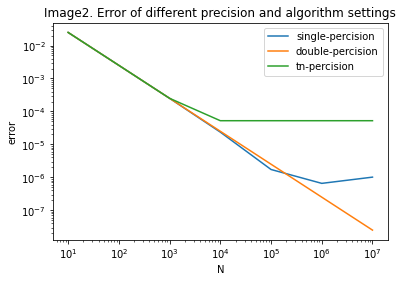

In [15]:
tn_array=np.abs(np.array(sums_TN)-np.pi/4)
f=plt.figure()
plt.loglog(Xs,single_array,label="single-percision")
plt.loglog(Xs,double_array,label="double-percision")
plt.loglog(Xs,tn_array,label="tn-percision")
plt.xlabel("N")
plt.ylabel("error")
plt.title("Image2. Error of different precision and algorithm settings")
plt.legend()
plt.show()

# (d) 1 point
Explain the differences you found in the results from (b) and (c).

###  Quantitative  analysis
#### (b)Single and double Percision Summation
When $n<=10^5$, the error of $\frac{1}{2n+1}$ is still covered by the machine percision which is $\frac{1}{2}*10^{-6}$. Hence, The prominent error in summation is the accumulated rounding error which comes out to be minor.
When $n>10^5$, the error of $\frac{1}{2n+1}$ exceeds the machine percision so the accumulated rounding error become larger.

At the same time, when n is odd, taking n=$10^6+1$ as an example, $S_{n}=S_{n-1}-\frac{1}{2n+1}=0.78539884-4.9999977*10^{-7}$, which has evident cancellation as normalisation. Thus, when $n>10^5$ all negtive items in summation lose percision and cannot contribute extra percision in approximation to $\frac{\pi}{4}$, leading the error after $10^{5}$ remains the identical level.  
However, error in double precision calculation decreased proportionally with N increasing in log order.

#### (c)Summation of $T_N$
The result of $T_N$ shows that this method lose percision at the very early stage where $n=10^4$. $T_N$ takes subtraction between pair items as $b_n$ and then sum items together. When $n=4*10^4$, $b_{1999}=a_{3998}+a_{3999}=\frac{1}{1999*4+1}-\frac{1}{1999*4+3}=3.1272066e-08$. Consider $T_{2000}=T_{1999}+b_n$. The result will roundoff the whole $b_n$ item. 
Thus, the rounding error makes this method can not contribute better precision after $n>10^4$.

### Qualitative comparative analysis
Comparing results in Image2., we find when N<$10^3$, errors in $T_n$ are same with errors in single and double precision in calculating $S_n$. However, when N>$10^3$, error in $T_n$ are larger than other two errors and remains the same when N>$10^4$. Besides, $S_n$ errors in double precision decreased proportionally with N increasing. Overall $S_n$ errors in single precision is somewhere between $T_n$ and double precision. In a conclusion We can choose different setting in calculation to achieve lowest error and high computational efficiency at same time by above analysis.

## (e) 2 points
Use the following _compensated summation_ algorithm (due to Kahan) to sum the $a_n$, again using only single precision. Visualize the errors in a log-log plot.

$
s = x_1\\
c = 0\\
\textbf{for } i = 2 \textbf{ to } n\\
\quad y = x_i - c\\
\quad t = s+y\\
\quad c = (t-s) - y\\
\quad s = t\\
\textbf{end}
$

In [16]:

def compute_SN_single_with_compenstaion(N):
    n=np.single(0)
    sn=np.single(0)
    c=np.single(0)
    while n<N:
        ai=np.single(-1)**n/(np.single(2)*n+np.single(1))
        y=ai-c
        t=sn+y
        c=(t-sn)-y
        sn=t
        n+=np.single(1)
    return sn
sums_with_compensation=list(map(lambda x:compute_SN_single_with_compenstaion(x),Ns))

In [17]:
print(sums)
print(sums_single)
print(sums_with_compensation)

[0.7604599047323508, 0.7828982258896384, 0.7851481634599485, 0.7853731633975086, 0.7853956633974299, 0.7853979133974436, 0.7853981383974479]
[0.7604599, 0.7828981, 0.78514814, 0.78537464, 0.78539646, 0.78539884, 0.7853992]
[0.7604599, 0.7828982, 0.78514814, 0.78537315, 0.7853956, 0.7853979, 0.7853981]


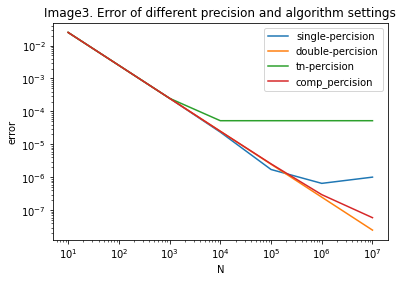

In [18]:
comp_array=np.abs(np.array(sums_with_compensation)-np.pi/4)
f=plt.figure()
plt.loglog(Xs,single_array,label="single-percision")
plt.loglog(Xs,double_array,label="double-percision")
plt.loglog(Xs,tn_array,label="tn-percision")
plt.loglog(Xs,comp_array,label="comp_percision")
plt.xlabel("N")
plt.ylabel("error")
plt.title("Image3. Error of different precision and algorithm settings")
plt.legend()
plt.show()

# (f) 1 point
Explain the differences you found in the results from (b) and (e).

###  Quantitative  analysis
The compensated summation is based on simulating double precision floating point addition in single precision arithmetic. When we calculate a+b, the Kahan's method computes the rounding error in this step, which is 
$$ c=fl(fl(b-s)+a)$$
For example, $a=0.1234567, b=0.7654321*10^4$, $s=0.76544443*10^4$, then $c=-0.1240000+0.1234567=-0.54329634*10^{-3}$. 

At every step of summation, c could pick up the lost precision in fl(a+b). The compensated summation will keep the precision until the item achieves the machine precision.

### Qualitative comparative analysis
Comparing visualization result in Image3., we find when N<$10^4$ errors of compensated summation is equal to error of single and double precision in calculating $S_n$;  When $10^4$<N<$10^5$, error of compensated summation is same  with double precision error but larger than single precision error; When N>$10^5$, compensated summation error is between single and double precision.
In general, the error ofcompensated summation similiar with the error of double precision from N=$10^1$ to N=$10^7$.